In [1]:
import openmatrix as omx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas

In [2]:
# Have matplotlib render plots "in-line" rather than in a separate window
# %matplotlib

In [3]:
trip_tables_file = r'C:/Users/ben_k/work_stuff/tdm/datastore/sample_data/AfterSC_Final_AM_Tables.omx'

In [4]:
trip_tables_omx = omx.open_file(trip_tables_file, 'r')

In [5]:
trip_tables_omx.list_matrices()

['Bike',
 'DAT_Boat',
 'DAT_CR',
 'DAT_LB',
 'DAT_RT',
 'DET_Boat',
 'DET_CR',
 'DET_LB',
 'DET_RT',
 'HOV',
 'HOV2p',
 'HOV3p',
 'HOV_Person_Trips',
 'Heavy_Truck',
 'Heavy_Truck_HazMat',
 'Light_Truck',
 'Medium_Truck',
 'Medium_Truck_HazMat',
 'SOV',
 'WAT',
 'Walk']

In [6]:
trip_tables_omx.shape()

(5839, 5839)

In [7]:
trip_tables_omx.list_mappings()

['CTPS', 'ID', 'MAPC', 'extZ', 'intZ']

In [8]:
taz_to_omxid = trip_tables_omx.mapping('ID')

In [9]:
skim_file = r'C:/Users/ben_k/work_stuff/tdm/datastore/sample_data/AM_SOV_Skim.omx'

In [10]:
skim_omx = omx.open_file(skim_file, 'r')

In [11]:
skim_omx.list_matrices()

['Auto_Toll (Skim)',
 'CongTime',
 'CongTime_wTerminalTimes',
 'Drive_Cost',
 'LT_Toll (Skim)',
 'Length (Skim)',
 'TerminalTimes',
 'Total_Cost']

In [12]:
skim_omx.shape()

(5839, 5839)

In [13]:
# Rows and columns in skim tables and trip_tables
dim = skim_omx.shape()[0]
dim

5839

In [14]:
skim_omx.list_mappings()

['Destination', 'Origin', 'extZ', 'inCTPS', 'intZ']

In [17]:
t_lengths = skim_omx['Length (Skim)']

In [18]:
t_lengths_np = np.array(t_lengths)

In [19]:
t_lengths_flat = t_lengths_np.flatten(order='C')

In [20]:
tt_sov = trip_tables_omx['SOV']

In [21]:
tt_sov_np =  np.array(tt_sov)

In [22]:
tt_sov_flat = tt_sov_np.flatten(order='C')

In [26]:
# bins for classification
bins =       [ 1.0,      5.0,      10.0,       20.0,       50.0,      100.0,       10000.0 ]

In [27]:
classification = np.digitize(t_lengths_flat, bins, right=False)

In [28]:
results = [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ]

In [29]:
for (num_trips, trip_len, bucket_ix) in zip(tt_sov_flat, t_lengths_flat, classification):
	results[bucket_ix] += num_trips
# end_for

In [30]:
results

[198066.32308231122,
 1502788.8968328047,
 902451.9585343441,
 682367.0491860535,
 383909.3063226921,
 82098.10765369986,
 18935.982961220136]

In [34]:
bin_labels = [ '< 1 mi', '1-5 mi', '5-10 mi', '10-20 mi', '20-50 mi', '50-100 mi', '> 100 mi' ]

<BarContainer object of 7 artists>

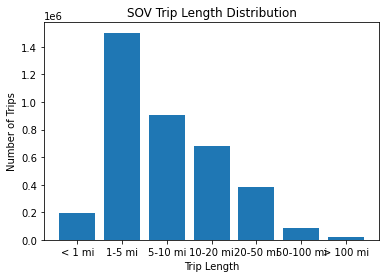

In [42]:
names = bin_labels
values = results
plt.title('SOV Trip Length Distribution')
plt.xlabel('Trip Length')
plt.ylabel('Number of Trips')
plt.bar(bin_labels, results)

In [43]:
def get_tld_for_mode(trip_lengths_skim, tt_omx, mode_name, bins):
	# Initialize return value
	results = [0.0 for x in bins]
	
	# Flatten trip_lengths array
	t_lengths_np = np.array(trip_lengths_skim)
	t_lengths_flat = t_lengths_np.flatten(order='C')
	
	# Number of trips TAZ-to-TAZ using specified mode
	tt = tt_omx[mode_name]
	tt_np =	 np.array(tt)
	tt_flat = tt_np.flatten(order='C')
	
	# Classify trip lengths into bins
	classification = np.digitize(t_lengths_flat, bins, right=False)
	
	for (num_trips, bucket_ix) in zip(tt_flat, classification):
		results[bucket_ix] += num_trips
	# end_for

	return results
# get_tld_for_mode()

In [44]:
sov_tld = get_tld_for_mode(skim_omx['Length (Skim)'], trip_tables_omx, 'SOV', bins)

In [45]:
sov_tld

[198066.32308231122,
 1502788.8968328047,
 902451.9585343441,
 682367.0491860535,
 383909.3063226921,
 82098.10765369986,
 18935.982961220136]

In [46]:
def plot_tld_for_mode(tld_array, bin_labels, plot_title):
	names = bin_labels
	values = tld_array
	plt.title(plot_title)
	plt.xlabel('Trip Length')
	plt.ylabel('Number of Trips')
	plt.bar(names, values)
# plot_tld_for_mode()

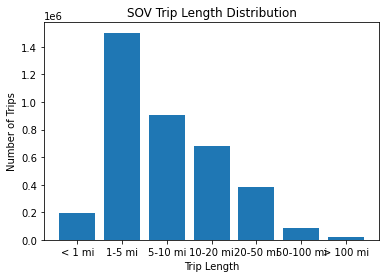

In [47]:
# Trip-length distribution for SOV mode
sov_tld = get_tld_for_mode(skim_omx['Length (Skim)'], trip_tables_omx, 'SOV', bins)
plot_tld_for_mode(sov_tld, bin_labels, 'SOV Trip Length Distribution')

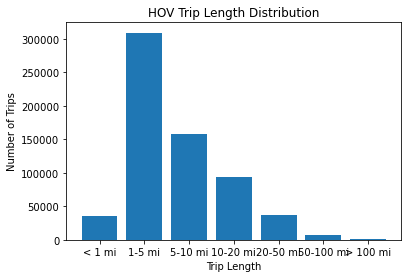

In [48]:
# Trip-length distribution for HOV mode
hov_tld = get_tld_for_mode(skim_omx['Length (Skim)'], trip_tables_omx, 'HOV', bins)
plot_tld_for_mode(hov_tld, bin_labels, 'HOV Trip Length Distribution')

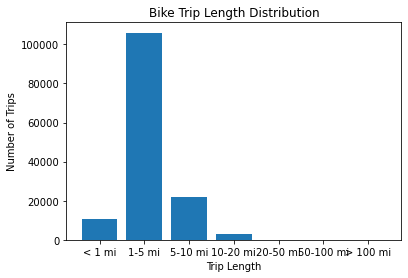

In [49]:
# Trip-length distribution for Bike mode
bike_tld = get_tld_for_mode(skim_omx['Length (Skim)'], trip_tables_omx, 'Bike', bins)
plot_tld_for_mode(bike_tld, bin_labels, 'Bike Trip Length Distribution')

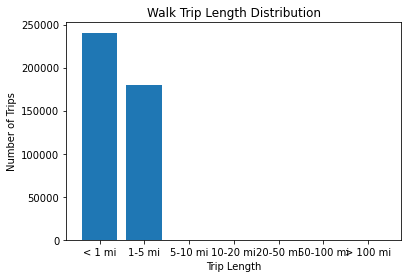

In [51]:
# Trip-length distribution for Walk mode
walk_tld = get_tld_for_mode(skim_omx['Length (Skim)'], trip_tables_omx, 'Walk', bins)
plot_tld_for_mode(walk_tld, bin_labels, 'Walk Trip Length Distribution')